In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

/usr/local/Caskroom/miniconda/base/envs/envallen/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data_dir = "./allendata"

manifest_path = os.path.join(data_dir, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)
sessions = cache.get_session_table()

In [4]:
session = cache.get_session_data(750332458)

/usr/local/Caskroom/miniconda/base/envs/envallen/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/Caskroom/miniconda/base/envs/envallen/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [5]:
session.probes

,description,location,sampling_rate,lfp_sampling_rate,has_lfp_data
id,,,,,
757904545,probeA,See electrode locations,29999.968724,1249.998697,True
757904547,probeB,See electrode locations,29999.918181,1249.996591,True
757904550,probeC,See electrode locations,29999.996461,1249.999853,True
757904554,probeD,See electrode locations,29999.922462,1249.996769,True
757904557,probeE,See electrode locations,29999.998841,1249.999952,True
757904559,probeF,See electrode locations,30000.040445,1250.001685,True


In [ ]:
table = session.get_stimulus_table("static_gratings")
table.head()

/usr/local/Caskroom/miniconda/base/envs/envallen/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/Caskroom/miniconda/base/envs/envallen/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


,stimulus_block,start_time,stop_time,orientation,size,contrast,spatial_frequency,phase,stimulus_name,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,
49434,8.0,5398.833208,5399.083416,0.0,"[250.0, 250.0]",0.8,0.04,0.25,static_gratings,0.250209,4787
49435,8.0,5399.083416,5399.333625,0.0,"[250.0, 250.0]",0.8,0.32,0.0,static_gratings,0.250209,4788
49436,8.0,5399.333625,5399.583834,30.0,"[250.0, 250.0]",0.8,0.04,0.0,static_gratings,0.250209,4789
49437,8.0,5399.583834,5399.834042,90.0,"[250.0, 250.0]",0.8,0.08,0.75,static_gratings,0.250209,4790
49438,8.0,5399.834042,5400.084249,60.0,"[250.0, 250.0]",0.8,0.08,0.25,static_gratings,0.250206,4791


In [32]:
table_grouped = table.groupby(["spatial_frequency", "phase", "orientation", "size"])
table_grouped.get_group((0.02, '0.0', 0.0, '[250.0, 250.0]')).head()

,stimulus_block,start_time,stop_time,orientation,size,contrast,spatial_frequency,phase,stimulus_name,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,
49580,8.0,5435.363725,5435.613934,0.0,"[250.0, 250.0]",0.8,0.02,0.0,static_gratings,0.250209,4872
49858,8.0,5504.921808,5505.172021,0.0,"[250.0, 250.0]",0.8,0.02,0.0,static_gratings,0.250214,4872
49890,8.0,5512.928518,5513.178726,0.0,"[250.0, 250.0]",0.8,0.02,0.0,static_gratings,0.250209,4872
49928,8.0,5522.436455,5522.686661,0.0,"[250.0, 250.0]",0.8,0.02,0.0,static_gratings,0.250206,4872
50195,8.0,5589.242249,5589.492460,0.0,"[250.0, 250.0]",0.8,0.02,0.0,static_gratings,0.250211,4872


In [ ]:
visam_ids = session.units[session.units["ecephys_structure_acronym"] == "VISam"]
visam_ids

In [41]:
spike_times_drifting = session.presentationwise_spike_times(
    stimulus_presentation_ids=table.index.values,
    unit_ids =session.units.index.values
)

spike_times_drifting.head()

,stimulus_presentation_id,unit_id,time_since_stimulus_presentation_onset
spike_time,,,
5398.833317,49434,951812960,0.000109
5398.833351,49434,951815279,0.000143
5398.833658,49434,951820071,0.000451
5398.833693,49434,951825526,0.000485
5398.833892,49434,951820022,0.000684


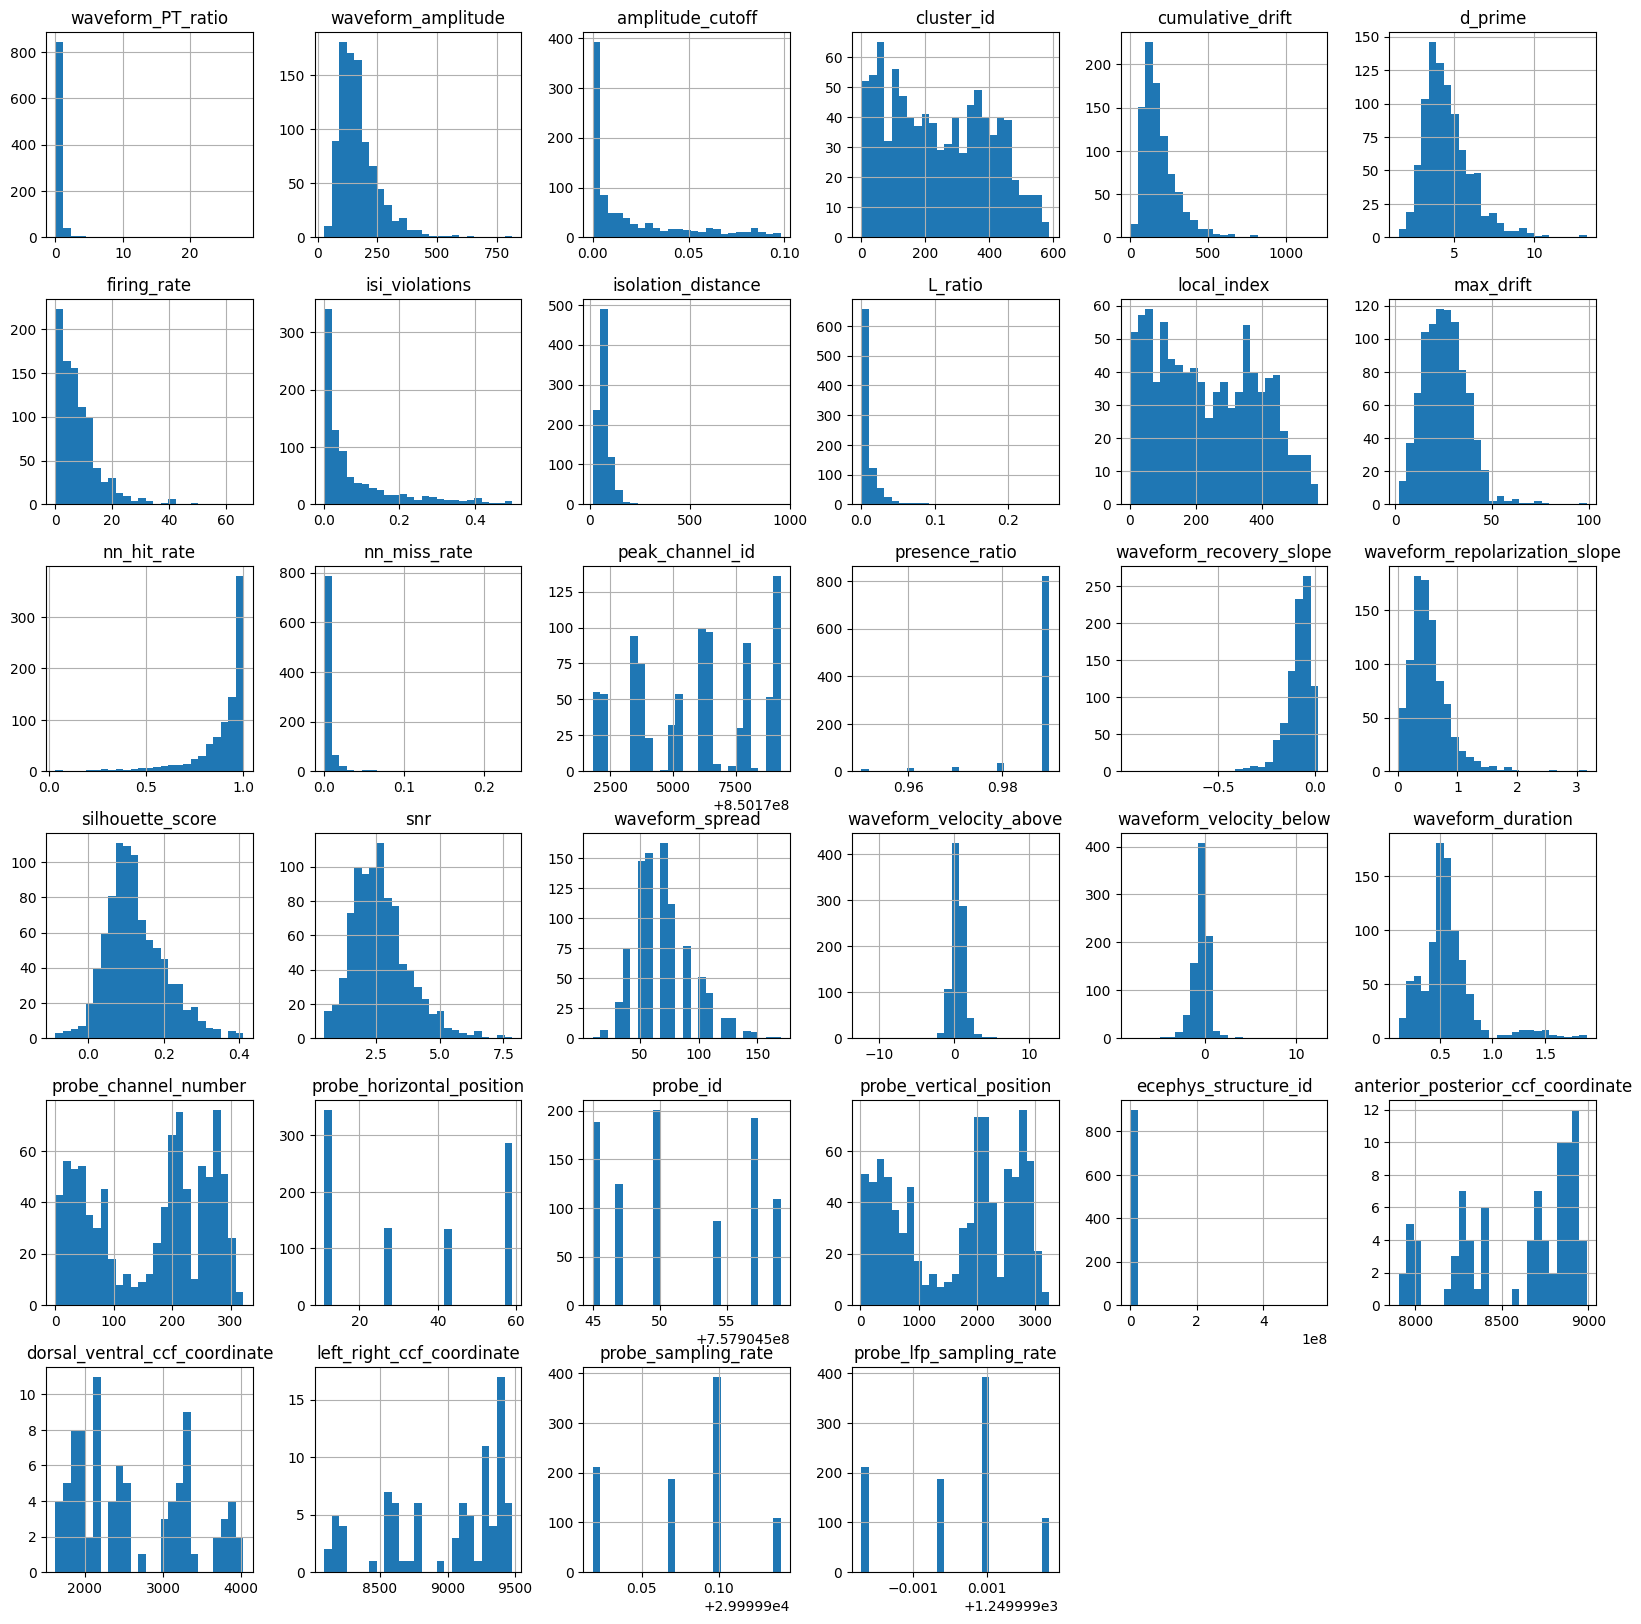

In [ ]:
fig = session.units.hist(figsize=(20, 20), bins=25)

In [63]:
type(session.units.columns)

pandas.core.indexes.base.Index

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

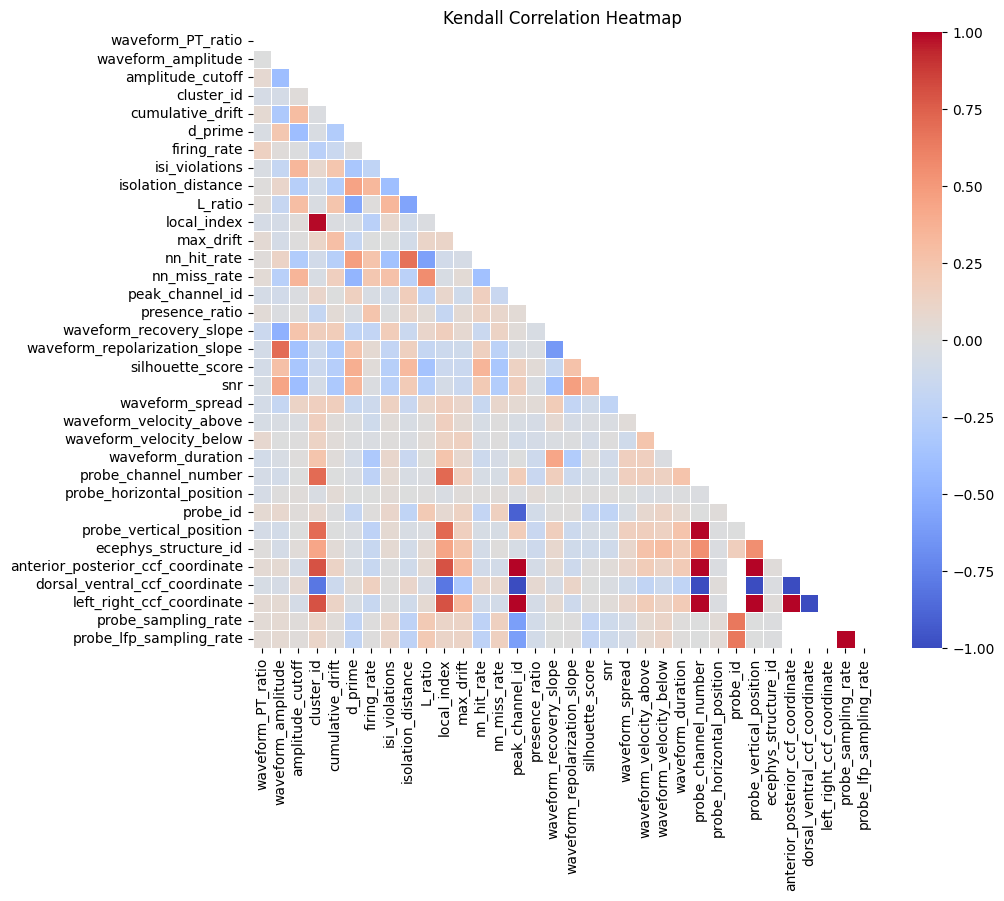

In [74]:
corr_matrix = session.units.select_dtypes('number').corr(method="kendall")

plt.figure(figsize=(10, 8))  # Set figure size
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Kendall Correlation Heatmap")
plt.show()

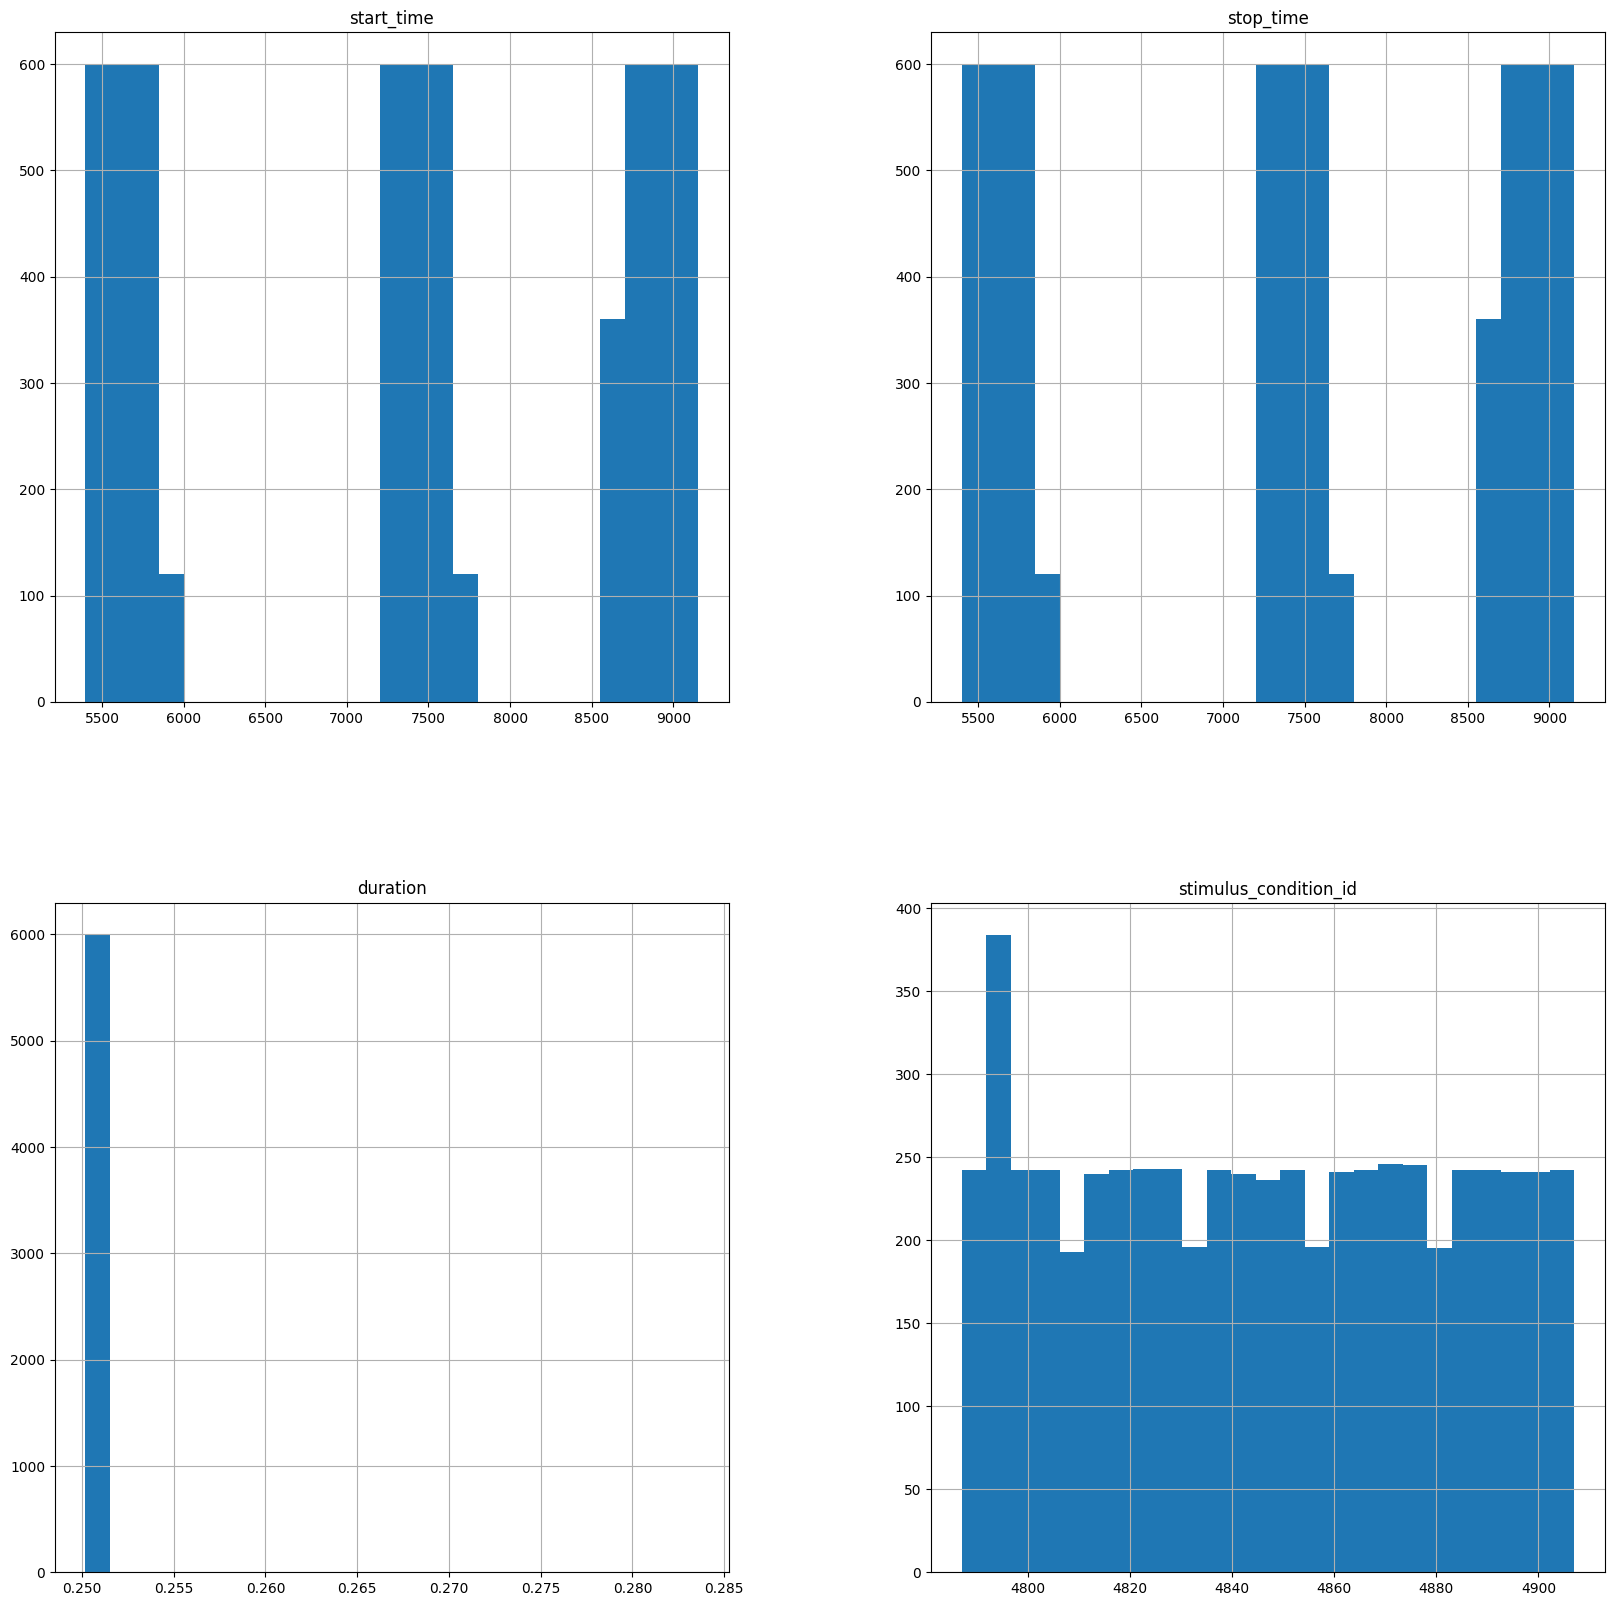

In [57]:
fig = table.hist(figsize=(20, 20), bins=25)

# Probe study

Each probe touches its own area, with a probe having or not the LFP data; sometimes a probe only has the spike data.

In [7]:
{session.probes.loc[probe_id].description : 
     list(session.channels[session.channels.probe_id == probe_id].ecephys_structure_acronym.unique())
     for probe_id in session.probes.index.values}

{'probeA': ['VISam', nan, 'grey'],
 'probeB': ['grey', 'VISpm', nan],
 'probeC': ['grey', nan, 'VISp'],
 'probeD': ['IntG', 'IGL', 'LGd', 'CA3', 'DG', 'CA1', 'VISl', nan],
 'probeE': [nan, 'grey', 'VISal'],
 'probeF': ['grey', nan, 'VISrl']}